# Electricity & Weather Data Analysis

# Introduction
The [Energy_Use_Info](https://github.com/MichaelSalata/Energy_Use_Info) is meant to gather insights on electricity usage.

This notebook looks for insights into electricity usage relative to weather data. It takes in the electricity & weather data for my house that I cleaned & prepared.  Then it creates some quick visualizations to give some first impressions of the data.

## Data
* This notebook uses data cleaned with "green_button_data_cleaning.ipynb" aka:  clean_energy_use_*.csv
* This notebook uses data cleaned with "weather_data_cleaning.ipynb.ipynb" aka: clean_weather_*.csv


## My Energy Data Source
Currently, the data is from my energy company(ComEd) from the past year. 10_22_2022 to 10_22_2023
Data from the [My Green Button](https://secure.comed.com/MyAccount/MyBillUsage/pages/secure/GreenButtonConnectDownloadMyData.aspx) webpage on the ComEd website.

## My Weather Data Source
My weather data was collected using [Meteostat](https://github.com/meteostat/meteostat-python). The Meteostat Python library provides a simple API for accessing open weather and climate data. The historical observations and statistics are collected by Meteostat from different public interfaces, most of which are governmental.

Among the data sources are national weather services like the National Oceanic and Atmospheric Administration (NOAA) and Germany's national meteorological service (DWD).

# Data Column Descriptions

## energy_df
* **DATE**: Day recorded
* **START_TIME**: start of recording (Date Hour:Minutes:Seconds)
* **END_TIME**: end of recording (Date Hour:Minutes:Seconds)
* **USAGE**: Electric usage (kWh)
* **COST**: amount charged for energy usage (USD)

## weather_df
src: [Meteostat Documentation](https://dev.meteostat.net/python/hourly.html#data-structure)

| | | |
|-|-|-|
|**Column**|**Description**|**Type**|
|**time**|datetime of the observation|Datetime64|
|**temp**|air temperature in *°C*|Float64|
|**dwpt**|dew point in *°C*|Float64|
|**rhum**|relative humidity in percent (*%*)|Float64|
|**prcp**|one hour precipitation total in *mm*|Float64|
|**wdir**|average wind direction in degrees (*°*)|Float64|
|**wspd**|average wind speed in *km/h*|Float64|
|**pres**|average sea-level air pressure in *hPa*|Float64|

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Import clean_energy_use spreadsheet from 'data' directory

# Define the directory path and the regular expression pattern
import glob
directory_path = "./data"
file_pattern = "clean_energy_use*.csv"

# Use glob.glob to match filenames based on the pattern
file_path = glob.glob(f"{directory_path}/{file_pattern}")[0]
energy_df = pd.read_csv(filepath_or_buffer=file_path)
energy_df.info()
energy_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17517 entries, 0 to 17516
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_TIME  17517 non-null  object 
 1   DATE        17517 non-null  object 
 2   END_TIME    17517 non-null  object 
 3   USAGE       17517 non-null  float64
 4   COST        17517 non-null  float64
dtypes: float64(2), object(3)
memory usage: 684.4+ KB


,START_TIME,DATE,END_TIME,USAGE,COST
0,2022-10-22 00:00:00,2022-10-22,2022-10-22 00:29:00,0.11,0.01
1,2022-10-22 00:30:00,2022-10-22,2022-10-22 00:59:00,0.13,0.02
2,2022-10-22 01:00:00,2022-10-22,2022-10-22 01:29:00,0.09,0.01
3,2022-10-22 01:30:00,2022-10-22,2022-10-22 01:59:00,0.20,0.02
4,2022-10-22 02:00:00,2022-10-22,2022-10-22 02:29:00,0.10,0.01


In [9]:
# Import clean_weather spreadsheet from 'data' directory

# Define the directory path and the regular expression pattern
import glob
directory_path = "./data"
file_pattern = "clean_weather*.csv"

# Use glob.glob to match filenames based on the pattern
file_path = glob.glob(f"{directory_path}/{file_pattern}")[0]
weather_df = pd.read_csv(filepath_or_buffer=file_path)
weather_df.info()
weather_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8785 entries, 0 to 8784
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    8785 non-null   object 
 1   temp    8785 non-null   float64
 2   dwpt    8785 non-null   float64
 3   rhum    8785 non-null   float64
 4   prcp    8785 non-null   float64
 5   wdir    8785 non-null   float64
 6   wspd    8785 non-null   float64
 7   pres    8785 non-null   float64
dtypes: float64(7), object(1)
memory usage: 549.2+ KB


,time,temp,dwpt,rhum,prcp,wdir,wspd,pres
0,2022-10-21 00:00:00,13.0,1.1,44.0,0.0,190.0,7.6,1008.0
1,2022-10-21 01:00:00,10.7,1.0,51.0,0.0,160.0,7.6,1008.0
2,2022-10-21 02:00:00,9.0,1.5,59.0,0.0,180.0,5.4,1008.0
3,2022-10-21 03:00:00,9.0,1.5,59.0,0.0,180.0,5.4,1008.0
4,2022-10-21 04:00:00,7.6,1.5,65.0,0.0,170.0,5.4,1008.0


## Observations & TODOs

- [x] convert the time/START_TIME cols into Datetime objs
- [x] convert half-hour data granularity of the energy_df into 1hr rows
- [x] Merge the dataset on the time start of each row
- [x] calculate a temperature_feel col from weather data
- [x] analyze correlations between weather variables and electricty usage
- [x] vizualize correlations
- [x] analyze correlations
- [x] vizualize: xaxis:bucket temperatures every 10F, yaxis:electricity usage

In [10]:
# convert the time cols into Datetime objs
weather_df['time'] = pd.to_datetime(weather_df['time'], format='%Y-%m-%d %H:%M:%S')
print(weather_df['time'].dtypes)
weather_df.head(4)

datetime64[ns]


,time,temp,dwpt,rhum,prcp,wdir,wspd,pres
0,2022-10-21 00:00:00,13.0,1.1,44.0,0.0,190.0,7.6,1008.0
1,2022-10-21 01:00:00,10.7,1.0,51.0,0.0,160.0,7.6,1008.0
2,2022-10-21 02:00:00,9.0,1.5,59.0,0.0,180.0,5.4,1008.0
3,2022-10-21 03:00:00,9.0,1.5,59.0,0.0,180.0,5.4,1008.0


In [11]:
# convert the START_TIME col into Datetime objs
energy_df['START_TIME'] = pd.to_datetime(energy_df['START_TIME'], format='%Y-%m-%d %H:%M:%S')
print(energy_df['START_TIME'].dtypes)
energy_df.head(4)

datetime64[ns]


,START_TIME,DATE,END_TIME,USAGE,COST
0,2022-10-22 00:00:00,2022-10-22,2022-10-22 00:29:00,0.11,0.01
1,2022-10-22 00:30:00,2022-10-22,2022-10-22 00:59:00,0.13,0.02
2,2022-10-22 01:00:00,2022-10-22,2022-10-22 01:29:00,0.09,0.01
3,2022-10-22 01:30:00,2022-10-22,2022-10-22 01:59:00,0.20,0.02


In [12]:
# convert half-hour data granularity of the energy_df into 1hr rows
energy_df['HOUR'] = energy_df['START_TIME'].dt.floor('H')
print(energy_df['HOUR'].dtypes)
energy_df.head(4)

datetime64[ns]


,START_TIME,DATE,END_TIME,USAGE,COST,HOUR
0,2022-10-22 00:00:00,2022-10-22,2022-10-22 00:29:00,0.11,0.01,2022-10-22 00:00:00
1,2022-10-22 00:30:00,2022-10-22,2022-10-22 00:59:00,0.13,0.02,2022-10-22 00:00:00
2,2022-10-22 01:00:00,2022-10-22,2022-10-22 01:29:00,0.09,0.01,2022-10-22 01:00:00
3,2022-10-22 01:30:00,2022-10-22,2022-10-22 01:59:00,0.20,0.02,2022-10-22 01:00:00


In [13]:
# convert half-hour data granularity of the energy_df into 1hr rows
energy_pivot = energy_df.pivot_table(index='HOUR', values=['USAGE', 'COST'], aggfunc='sum')
energy_pivot.reset_index(inplace=True)
print(energy_pivot.columns)
energy_pivot.head(2)

Index(['HOUR', 'COST', 'USAGE'], dtype='object')


,HOUR,COST,USAGE
0,2022-10-22 00:00:00,0.03,0.24
1,2022-10-22 01:00:00,0.03,0.29


In [14]:
energy_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   HOUR    8759 non-null   datetime64[ns]
 1   COST    8759 non-null   float64       
 2   USAGE   8759 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 205.4 KB


In [15]:
# convert HOUR col back to datetime
energy_pivot['HOUR'] = pd.to_datetime(energy_pivot['HOUR'], format='%Y-%m-%d %H:%M:%S')

In [16]:
# make sure 'time' columns for weather_df match the 'HOUR' col in energy_df
weather_df.head(3)

,time,temp,dwpt,rhum,prcp,wdir,wspd,pres
0,2022-10-21 00:00:00,13.0,1.1,44.0,0.0,190.0,7.6,1008.0
1,2022-10-21 01:00:00,10.7,1.0,51.0,0.0,160.0,7.6,1008.0
2,2022-10-21 02:00:00,9.0,1.5,59.0,0.0,180.0,5.4,1008.0


In [17]:
# merge datasets
energy_weather_df = pd.merge(weather_df, energy_pivot, how='inner', left_on='time', right_on='HOUR')
energy_weather_df.head()

,time,temp,dwpt,rhum,prcp,wdir,wspd,pres,HOUR,COST,USAGE
0,2022-10-22 00:00:00,21.4,5.8,36.0,0.0,190.0,14.8,1007.0,2022-10-22 00:00:00,0.03,0.24
1,2022-10-22 01:00:00,19.6,6.1,41.0,0.0,180.0,16.6,1007.0,2022-10-22 01:00:00,0.03,0.29
2,2022-10-22 02:00:00,17.5,5.5,45.0,0.0,180.0,9.4,1008.0,2022-10-22 02:00:00,0.02,0.20
3,2022-10-22 03:00:00,14.0,5.2,55.0,0.0,160.0,11.2,1008.0,2022-10-22 03:00:00,0.02,0.09
4,2022-10-22 04:00:00,14.2,5.4,55.0,0.0,170.0,11.2,1009.0,2022-10-22 04:00:00,0.02,0.09


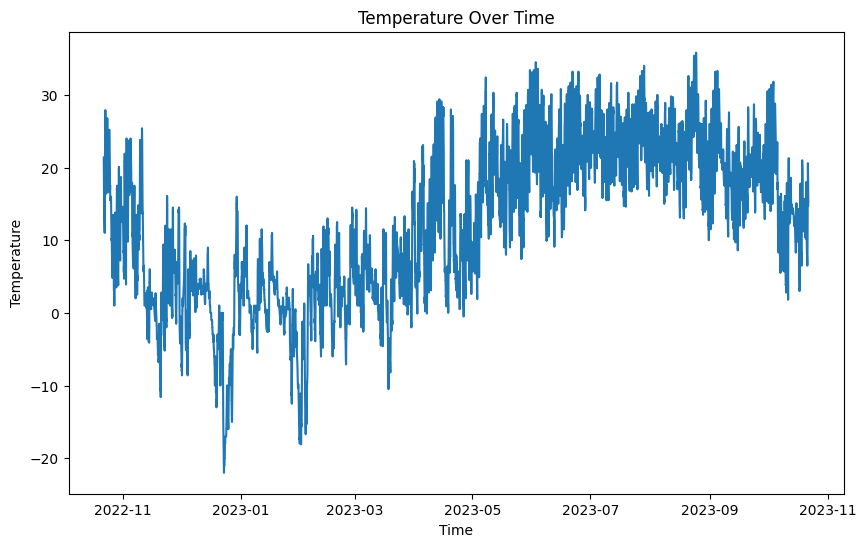

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(energy_weather_df['time'], energy_weather_df['temp'])
plt.title('Temperature Over Time')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.show()

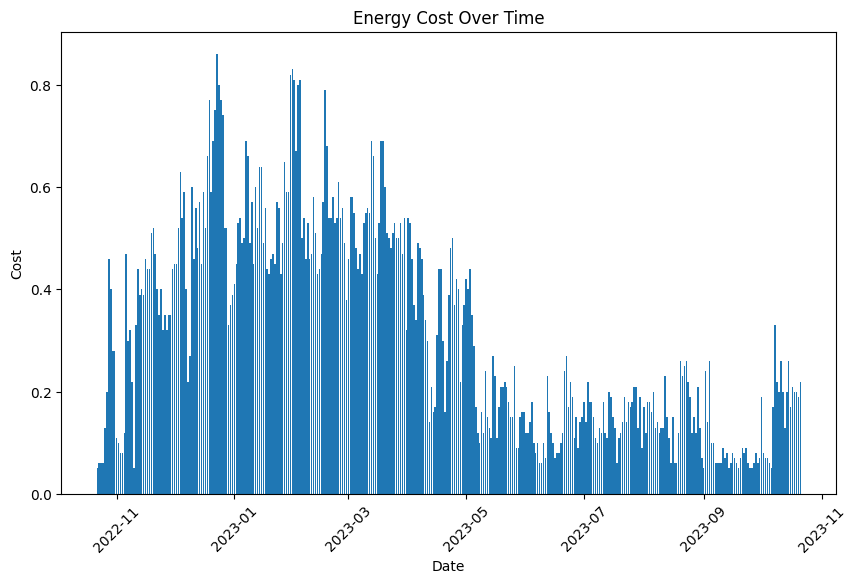

In [19]:
plt.figure(figsize=(10, 6))
plt.bar(energy_weather_df['time'].dt.date, energy_weather_df['COST'])
plt.title('Energy Cost Over Time')
plt.xlabel('Date')
plt.ylabel('Cost')
plt.xticks(rotation=45)
plt.show()


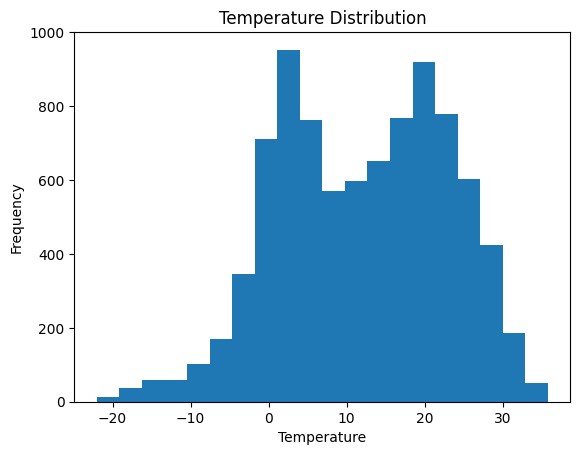

In [20]:
plt.hist(energy_weather_df['temp'], bins=20)
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()


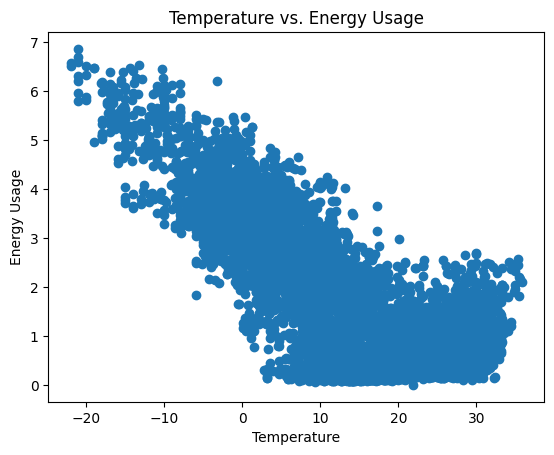

In [21]:
plt.scatter(energy_weather_df['temp'], energy_weather_df['USAGE'])
plt.title('Temperature vs. Energy Usage')
plt.xlabel('Temperature')
plt.ylabel('Energy Usage')
plt.show()



**prompt:** Temperature vs. Energy Usage, can you plot a line through the scatter plot that follows the average energy usage for each temperature?

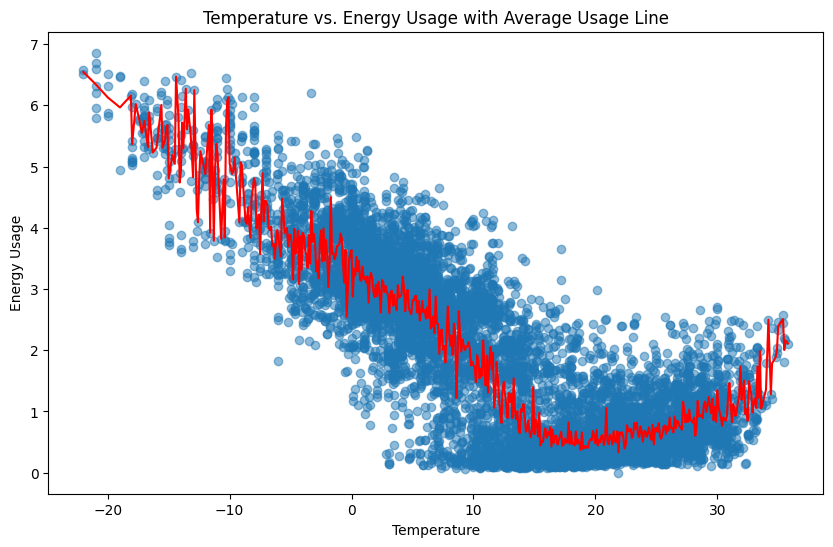

In [22]:
import numpy as np

# Scatter plot of Temperature vs. Energy Usage
plt.figure(figsize=(10, 6))
plt.scatter(energy_weather_df['temp'], energy_weather_df['USAGE'], alpha=0.5)

# Calculating the average energy usage for each temperature and plotting a line
# Group by temperature and calculate mean USAGE
temp_usage_avg = energy_weather_df.groupby('temp')['USAGE'].mean().reset_index()

# Sorting the values for a smooth line
temp_usage_avg = temp_usage_avg.sort_values(by='temp')

# Plotting the line
plt.plot(temp_usage_avg['temp'], temp_usage_avg['USAGE'], color='red')

# Adding titles and labels
plt.title('Temperature vs. Energy Usage with Average Usage Line')
plt.xlabel('Temperature')
plt.ylabel('Energy Usage')
plt.show()
